# Problem Statement


WHO is a specialized agency of the UN which is concerned with the world population health. Based upon the various parameters, WHO allocates budget for various areas to conduct various campaigns/initiatives to improve healthcare. Annual salary is an important variable which is considered to decide budget to be allocated for an area.  
  
We have a data which contains information about 32561 samples and 15 continuous and categorical variables. Extraction of data was done from 1994 Census dataset.  
  
The goal here is to build a binary model to predict whether the salary is >50K or <50K.

## Data Dictionary

1. <b>age:</b> age  
2. <b>workclass:</b> workclass  
3. <b>fnlwgt:</b> samplting weight  
4. <b>education:</b> highest education  
5. <b>education-no. of years:</b> number of years of education in total  
6. <b>marrital status:</b> marrital status  
7. <b>occupation:</b> occupation  
8. <b>relationship:</b> relationship  
9. <b>race:</b> race  
10. <b>sex:</b> sex  
11. <b>capital gain:</b> income from investment sources other than salary/wages  
12. <b>capital loss:</b> income from investment sources other than salary/wages  
13. <b>working hours:</b> nummber of working hours per week  
14. <b>native-country:</b> native country  
15. <b>salary:</b> salary  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
adult_data=pd.read_csv("adult.data.csv")

### EDA

In [3]:
adult_data.head()

,age,workclass,fnlwgt,education,education-no. of years,marrital status,occupation,relationship,race,sex,capital gain,capital loss,working hours per week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education-no. of years  32561 non-null  int64 
 5   marrital status         32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital gain            32561 non-null  int64 
 11  capital loss            32561 non-null  int64 
 12  working hours per week  32561 non-null  int64 
 13  native-country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

There are no missing values. 6 variables are numeric and remaining categorical. Categorical variables are not in encoded format

### Check for duplicate data

Number of duplicate rows = 24
(32561, 15)


There are 24 duplicates that needs to be removed

In [6]:
adult_data.drop_duplicates(inplace=True) 

In [7]:
dups = adult_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(adult_data.shape)

Number of duplicate rows = 0
(32537, 15)


### Geting unique counts of all Objects

In [8]:
adult_data.salary.value_counts(normalize=True)

 <=50K    0.759074
 >50K     0.240926
Name: salary, dtype: float64

In [9]:
for feature in adult_data.columns: 
    if adult_data[feature].dtype == 'object': 
        print(feature)
        print(adult_data[feature].value_counts())
        print('\n')
        

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


education
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64


marrital status
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marrital status, dtype: int64


occupation
 Prof-specialty 

workclass, occupation,native-country has ?  
Since, high number of cases have ?, we will convert them into a new level

In [10]:
# Replace ? to new Unk category



In [11]:
adult_data.describe()

,age,fnlwgt,education-no. of years,capital gain,capital loss,working hours per week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Checking the spread of the data using boxplot for the continuous variables.

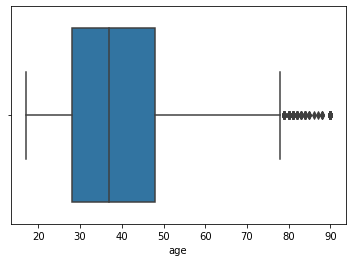

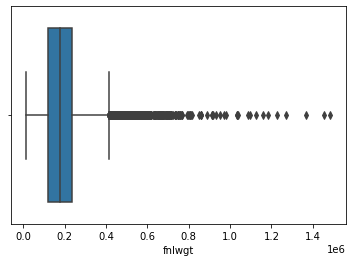

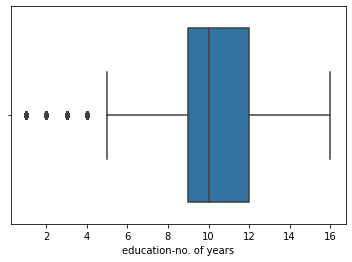

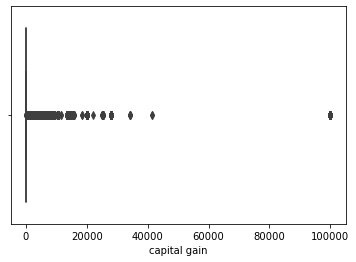

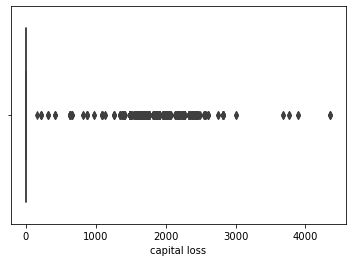

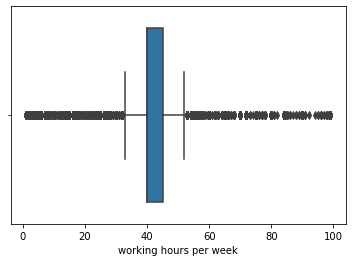

In [12]:
cols = ['age','fnlwgt','education-no. of years','capital gain','capital loss','working hours per week']




### Treating the outliers.
###### We can treat Outliers with the following code. We will treat the outliers for the 'Age' variable only.

In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

Lower Range : -2.0 
Upper Range : 78.0


In [15]:
## This is a loop to treat outliers for all the non-'object' type varible

# for column in adult_data.columns:
#     if adult_data[column].dtype != 'object': 
#         lr,ur=remove_outlier(adult_data[column])
#         adult_data[column]=np.where(adult_data[column]>ur,ur,adult_data[column])
#         adult_data[column]=np.where(adult_data[column]<lr,lr,adult_data[column])

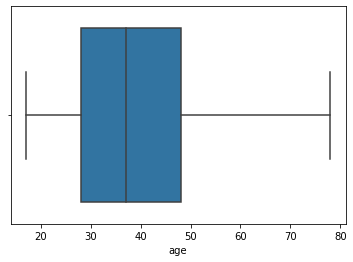

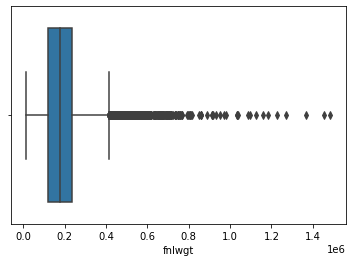

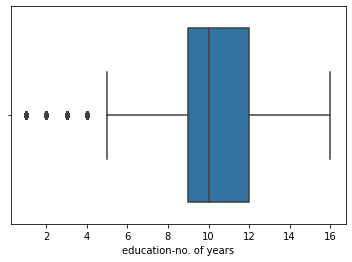

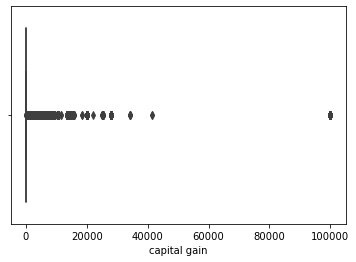

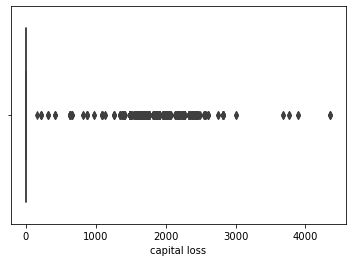

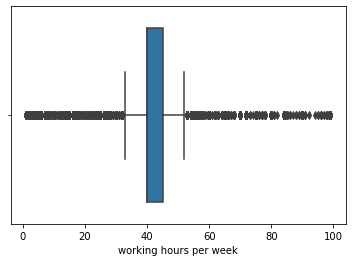

In [16]:
cols = ['age','fnlwgt','education-no. of years','capital gain','capital loss','working hours per week']




### Checking for Correlations.

In [17]:
adult_data.corr()

,age,fnlwgt,education-no. of years,capital gain,capital loss,working hours per week
age,1.000000,-0.076456,0.036738,0.078061,0.057813,0.070187
fnlwgt,-0.076456,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education-no. of years,0.036738,-0.043388,1.000000,0.122664,0.079892,0.148422
capital gain,0.078061,0.000429,0.122664,1.000000,-0.031639,0.078408
capital loss,0.057813,-0.010260,0.079892,-0.031639,1.000000,0.054229
working hours per week,0.070187,-0.018898,0.148422,0.078408,0.054229,1.000000


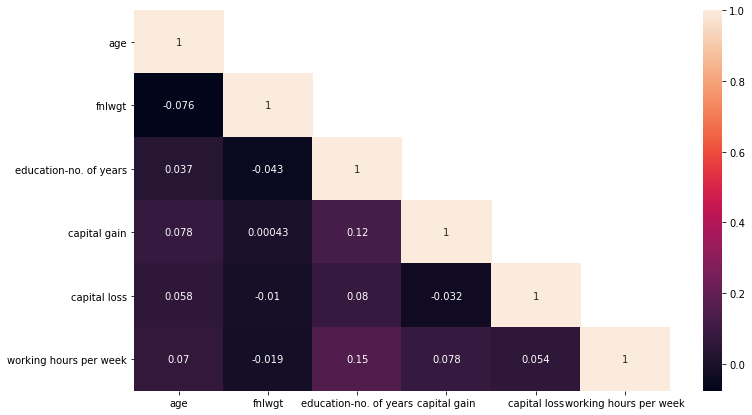

In [19]:
adult_data.describe()

,age,fnlwgt,education-no. of years,capital gain,capital loss,working hours per week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.559855,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.554847,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,78.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


There is hardly any correlation between the numeric variables

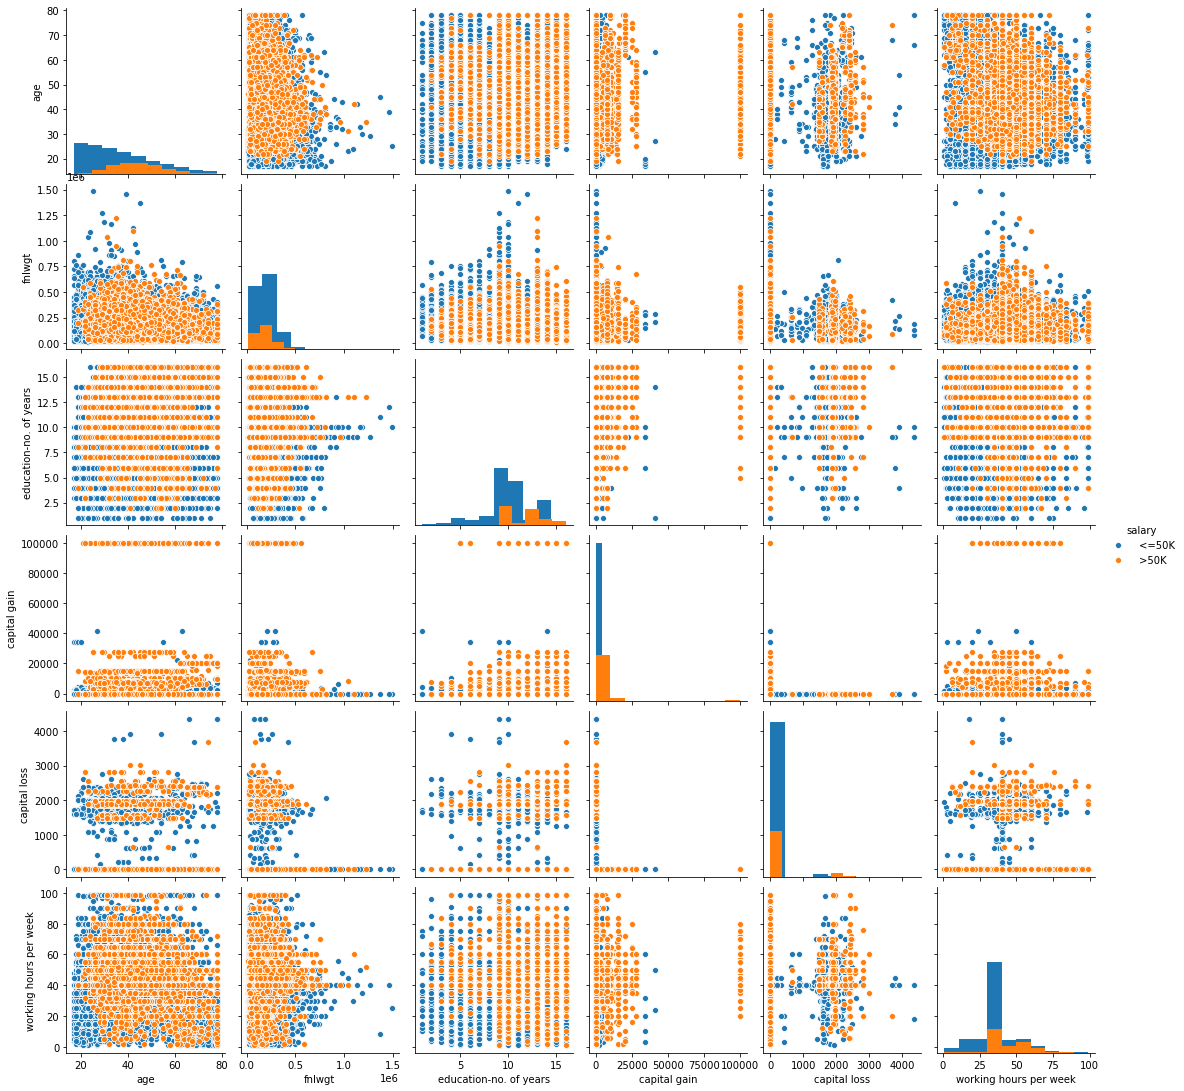

In [50]:
# Pairplot using sns
sns.pairplot(adult_data ,diag_kind='hist' ,hue='salary');

### Converting all objects to categorical codes



feature: workclass
[State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, Unk, Self-emp-inc, Without-pay, Never-worked]
Categories (9, object): [Federal-gov, Local-gov, Never-worked, Private, ..., Self-emp-not-inc, State-gov, Unk, Without-pay]
[6 5 3 0 1 7 4 8 2]


feature: education
[Bachelors, HS-grad, 11th, Masters, 9th, ..., 5th-6th, 10th, 1st-4th, Preschool, 12th]
Length: 16
Categories (16, object): [10th, 11th, 12th, 1st-4th, ..., Masters, Preschool, Prof-school, Some-college]
[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]


feature: marrital status
[Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed]
Categories (7, object): [Divorced, Married-AF-spouse, Married-civ-spouse, Married-spouse-absent, Never-married, Separated, Widowed]
[4 2 0 3 5 1 6]


feature: occupation
[Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, ..., Tech-support, Unk, Protective-serv, Armed-Forces, Priv-house

In [21]:
adult_data.head()

,age,workclass,fnlwgt,education,education-no. of years,marrital status,occupation,relationship,race,sex,capital gain,capital loss,working hours per week,native-country,salary
0,39.0,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50.0,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38.0,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53.0,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28.0,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


### Train Test Split

In [22]:
# Copy all the predictor variables into X dataframe


# Copy target into the y dataframe. 



In [23]:
# Split X and y into training and test set in 70:30 ratio



### Logistic Regression Model

We are making some adjustments to the parameters in the Logistic Regression Class to get a better accuracy. Details of which can be found out on the site scikit-learn mentioned below

<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>scikit-learn</a>

>Argument=solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem.

>For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

>For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

>‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

>‘liblinear’ and ‘saga’ also handle L1 penalty

>‘saga’ also supports ‘elasticnet’ penalty

>‘liblinear’ does not support setting penalty='none'

>Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

>New in version 0.17: Stochastic Average Gradient descent solver.

>New in version 0.19: SAGA solver.

>Changed in version 0.22: The default solver changed from ‘liblinear’ to ‘lbfgs’ in 0.22.

<a href='https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451'> Article on Solvers</a>



In [28]:
# Fit the Logistic Regression model



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   10.6s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

### Getting the Predicted Classes and Probs

,0,1
0,0.735358,0.264642
1,0.621100,0.378900
2,0.955457,0.044543
3,0.678107,0.321893
4,0.799012,0.200988


## Model Evaluation

In [31]:
# Accuracy - Training Data


0.8231833150384193

### AUC and ROC for the training data

AUC: 0.856


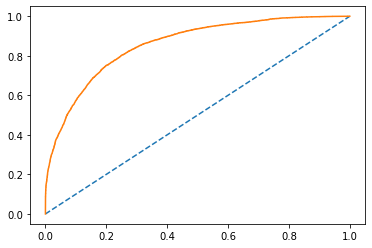

In [32]:
# predict probabilities

# keep probabilities for the positive outcome only

# calculate AUC


# calculate roc curve


# plot the roc curve for the model


In [33]:
# Accuracy - Test Data


0.8287236222085638

### AUC and ROC for the test data

AUC: 0.856


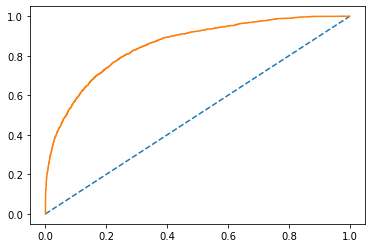

In [34]:
# predict probabilities

# keep probabilities for the positive outcome only

# calculate AUC


# calculate roc curve


# plot the roc curve for the model


### Confusion Matrix for the training data

array([[16262,  1026],
       [ 3001,  2486]], dtype=int64)

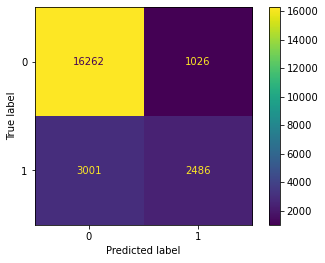

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     17288
           1       0.71      0.45      0.55      5487

    accuracy                           0.82     22775
   macro avg       0.78      0.70      0.72     22775
weighted avg       0.81      0.82      0.81     22775



### Confusion Matrix for test data

array([[7001,  409],
       [1263, 1089]], dtype=int64)

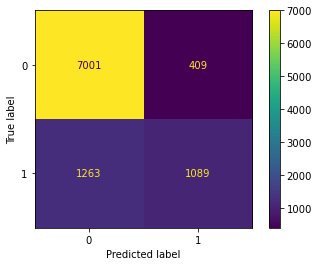

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7410
           1       0.73      0.46      0.57      2352

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762



## Applying GridSearchCV for Logistic Regression

# Conclusion

Accuracy on Test data is 81% and on Train data is 80%.  
AUC is 83% for both.   
Recall and Precision is low and same on both data.  
While the model results between training and test sets are similar, indicating no under or overfitting issues, overall prediction of the model is weaker in terms of predicting salary > 50k. Considering the class imabalance ratio is moderate and not high, with more training data, the model is expected to perform even better.

Note: Alternatively, one hot encoding can also be done instead of label encoding on categorical variables before building the logistic regression model. Do play around with these techniques using one hot encoding as well.

# Running in Google Colab
Importing jupyter notebook
1. Login to Google
2. Go to drive.google.com
3. Upload jupyter notebook file into the drive
4. double click it, or right click -&gt; open with -&gt; google colaboratory
Alternatively,
1. Login to Google
2. Go to https://colab.research.google.com/notebooks/intro.ipynb#recent=true
3. Upload the jupyter notebook

Loading dataset into colab
## Use the below code to load the dataset
from google.colab import files
uploaded = files.upload() # upload file here from local
import io
df2 = pd.read_csv(io.BytesIO(uploaded[&#39;Filename.csv&#39;])) #give the filename in quotes

Go to Runtime > change Runtime type > check if it points to Python

                                                    Happy Learning